In [1]:
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.9/387.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.0
    Uninstalling sympy-1.13.0:
      Successf

In [2]:
import classiq
classiq.authenticate()

Your user code: RZTS-JZTL
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=RZTS-JZTL


In [ ]:
# Practice codes

0.20399999999999996
0.21999999999999997
0.22550000000000003
0.2397499999999999
0.24449999999999994


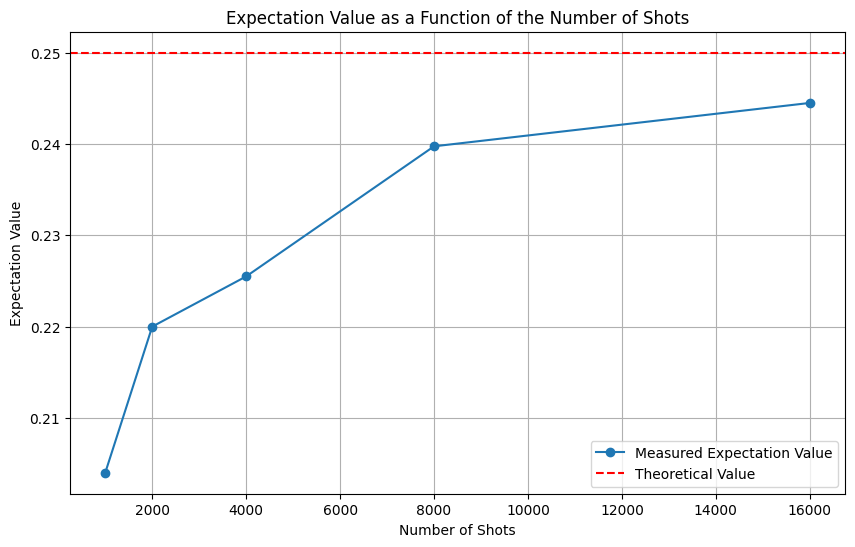

In [3]:
import matplotlib.pyplot as plt
from classiq import *
import numpy as np
from classiq import (

    Preferences,
    synthesize_async,
    execute_async,
    set_quantum_program_execution_preferences,

)
from classiq.execution import (
    ExecutionDetails,
    ExecutionPreferences,
    IBMBackendPreferences,
)

# Defining the Hadamard test function
@qfunc
def main(expectation_value: Output[QBit]):
    allocate(1, expectation_value)
    psi = QNum("psi")
    allocate(4, psi)
    H(expectation_value)
    control(expectation_value, lambda: qft(psi))
    H(expectation_value)

# Creating the quantum model
qmod = create_model(main)
shots_list = [1000, 2000, 4000, 8000, 16000]
theoretical_value = 0.25

# Function to run the Hadamard test and calculate the expectation value
def run_hadamard_test(shots):

    qprog = set_execution_preferences(qmod,ExecutionPreferences(num_shots=shots, random_seed = 767))
    qprog1 = synthesize(qprog)
    result = execute(qprog1).result()

    counts = result[0].value.counts
    total_counts = sum(counts.values())
    p0 = counts.get('0', 0) / total_counts
    # expectation_value = 2 * result[0].value.counts["0"] / sum(result[0].value.counts.values()) - 1
    expectation_value = 2 * p0 - 1
    print(expectation_value)

    return expectation_value




# Execute the program and collect results
expectation_values = [run_hadamard_test(shots) for shots in shots_list]


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(shots_list, expectation_values, 'o-', label='Measured Expectation Value')
# plt.axhline(y=1)
plt.axhline(theoretical_value, color='r', linestyle='--', label='Theoretical Value')
plt.xlabel('Number of Shots')
plt.ylabel('Expectation Value')
plt.title('Expectation Value as a Function of the Number of Shots')
plt.legend()
plt.grid(True)
plt.show()


# Explanation of the result:

**The Blue Line with the Dot** which is the **Measured Expectation Value**, represents the actual expectation value obtained from experimental measurements. As the number of shots increases, the measured expectation value fluctuates and it converges toward the theoretical value (0.25) but exhibits statistical noise due to quantum effects.

The **Theoretical Value** which is drawn as **Dashed Red Line** remains constant across all shot counts and it is 0.25

Achieving convergence to the theoretical value requires error mitigation techniques which are not applied here. Hence the expactation_value that I got from the shots **[2000,4000,6000,8000,16000]** are not exactly converged with the theoretical_value. The expactation_value that I got from the shots are:

0.20399999999999996

0.21999999999999997

0.22550000000000003

0.2397499999999999

0.24449999999999994